In [5]:
import kagglehub

# Downloading the latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1


In [11]:
import os

# Defining the correct dataset path
dataset_path = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1"

# Checking the directory structure at the root level
print("Dataset contents:", os.listdir(dataset_path))




Dataset contents: ['images']


In [12]:
# Defining the path to the 'images' folder
images_dir = os.path.join(dataset_path, 'images')

# Checking the contents inside the 'images' folder
print("Images directory contents:", os.listdir(images_dir))


Images directory contents: ['train', 'validation', 'images']


In [13]:
# Checking the contents of 'train' and 'validation' directories
train_dir = os.path.join(images_dir, 'train')
validation_dir = os.path.join(images_dir, 'validation')

# Also Listing the contents of both directories
print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(validation_dir))


Train directory contents: ['neutral', 'fear', 'surprise', 'happy', 'sad', 'angry', 'disgust']
Validation directory contents: ['neutral', 'fear', 'surprise', 'happy', 'sad', 'angry', 'disgust']


In [19]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator is part of tf.keras
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import load_img, img_to_array # Use tensorflow.keras.utils for load_img and img_to_array
#from keras.preprocessing.image import load_img, img_to_array # No longer needed
#from keras.preprocessing.image import ImageDataGenerator # No longer needed
from tensorflow.keras.layers import Dense, Input, Dropout # Use tensorflow.keras.layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

###Displaying some images

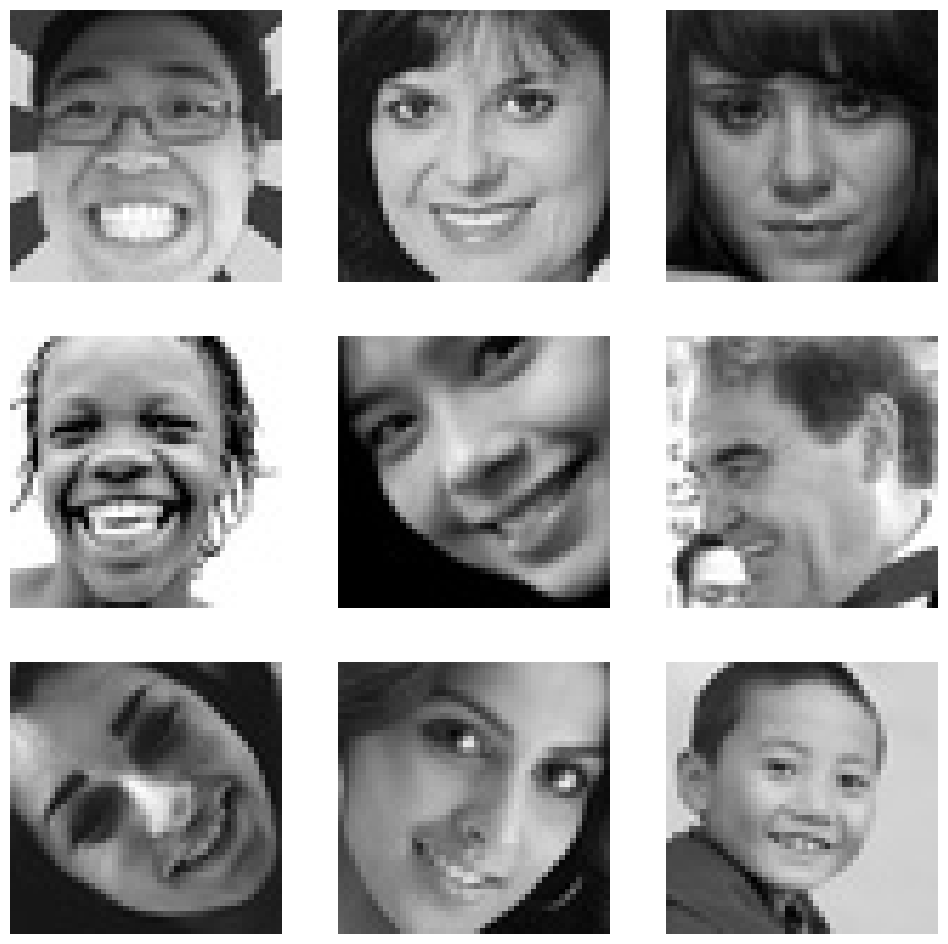

In [25]:

folder_path = '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/'
picture_size = (48, 48)  # 48x48 image size

# Expression to display, I will be picking happy
expression = 'happy'

# Plotting the images
plt.figure(figsize=(12, 12))
for i in range(1, 10):
    # Getting the image file path
    img_path = os.path.join(folder_path, 'train', expression, os.listdir(os.path.join(folder_path, 'train', expression))[i])

    # Loading the image and display it
    img = load_img(img_path, target_size=picture_size)
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.axis('off')  # It will Hide axis

plt.show()

#Data Augmentation (To prevent overfitting)

In [26]:
batch_size  = 128

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

train_set = datagen.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#Displaying the generated data

(128, 48, 48, 1)
(128, 48, 48, 1)
(128, 48, 48, 1)
(128, 48, 48, 1)


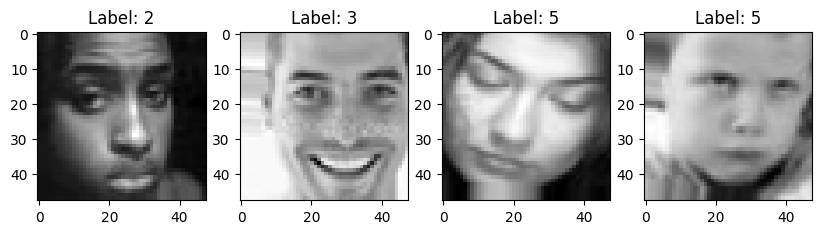

In [43]:
plt.figure(figsize= (10,10))
for i in range(1,5,1):
    img, label = next(train_set) # Use next(train_set) instead of train_set.next()
    print(img.shape)
    plt.subplot(3,4,i)
    plt.imshow(img[1,:,:,0], cmap='gray') # Displaying the image with grayscale colormap
    plt.title(f"Label: {np.argmax(label[1])}") # Displaying the label of the image
plt.show()

#CNN Architecture

In [44]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

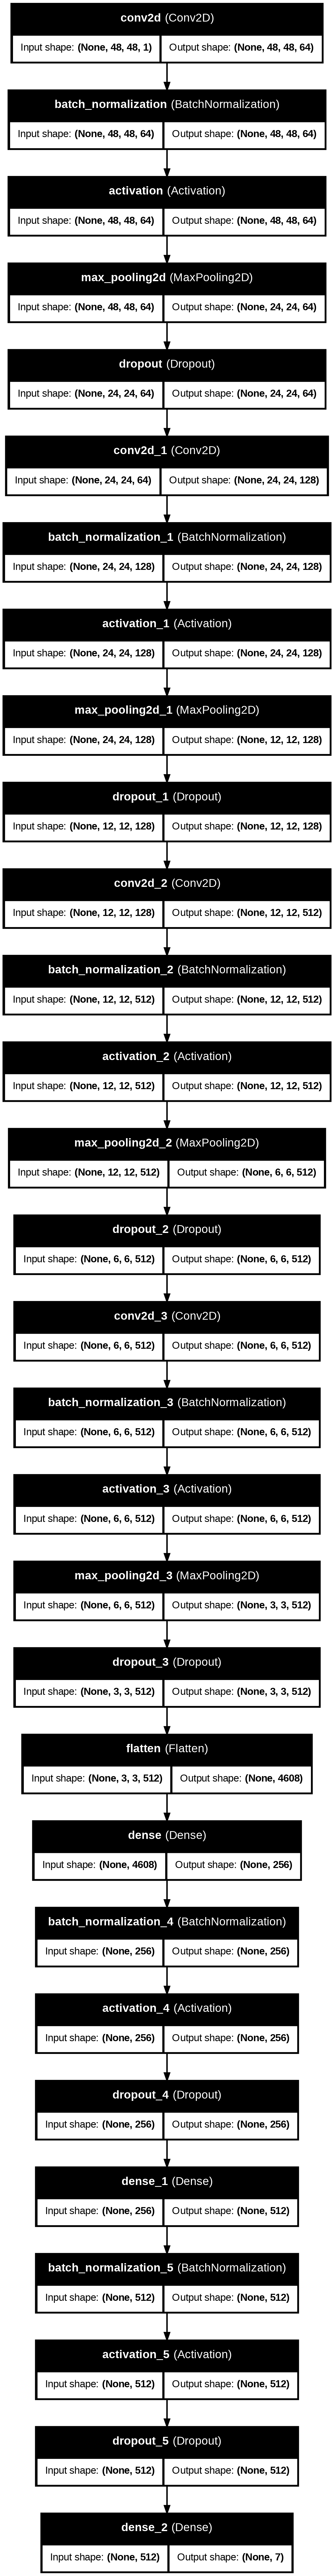

In [54]:

from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=1000, height=3000)

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

#Saving Model by checkpoint

In [56]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

#Compile model

In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

#Train the model

In [65]:
history = model.fit(x=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=10,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1519s 7s/step - accuracy: 0.2499 - loss: 1.9139 - val_accuracy: 0.2999 - val_loss: 1.8027 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/225 ━━━━━━━━━━━━━━━━━━━━ 25:46 7s/step - accuracy: 0.2656 - loss: 1.7868

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


225/225 ━━━━━━━━━━━━━━━━━━━━ 142s 603ms/step - accuracy: 0.2656 - loss: 1.7868 - val_accuracy: 0.2956 - val_loss: 1.8580 - learning_rate: 0.0010
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1558s 7s/step - accuracy: 0.3678 - loss: 1.6254 - val_accuracy: 0.4074 - val_loss: 1.5519 - learning_rate: 0.0010
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 142s 602ms/step - accuracy: 0.3906 - loss: 1.4983 - val_accuracy: 0.4109 - val_loss: 1.5312 - learning_rate: 0.0010
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1524s 7s/step - accuracy: 0.4327 - loss: 1.4615 - val_accuracy: 0.4420 - val_loss: 1.4448 - learning_rate: 0.0010
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 141s 606ms/step - accuracy: 0.3984 - loss: 1.5040 - val_accuracy: 0.4327 - val_loss: 1.4646 - learning_rate: 0.0010
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1561s 7s/step - accuracy: 0.4742 - loss: 1.3578 - val_accuracy: 0.4374 - val_loss: 1.4471 - learning_rate: 0.0010
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 141s 596ms/step - accuracy: 0.5547 - loss

#Predicting one value from test_set

(128, 48, 48, 1)
(48, 48, 1)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step
sad
class:5


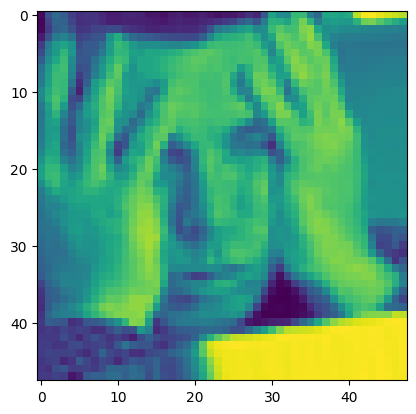

In [68]:
img, label = test_set[0]
print(img.shape)
print(img[1].shape)

plt.imshow(img[1])

y_pred = model.predict(img)
y_pred = np.argmax(y_pred, axis=1)
print(class_names[y_pred[0]])
print('class:'+ str(y_pred[0]))

#Display Stats

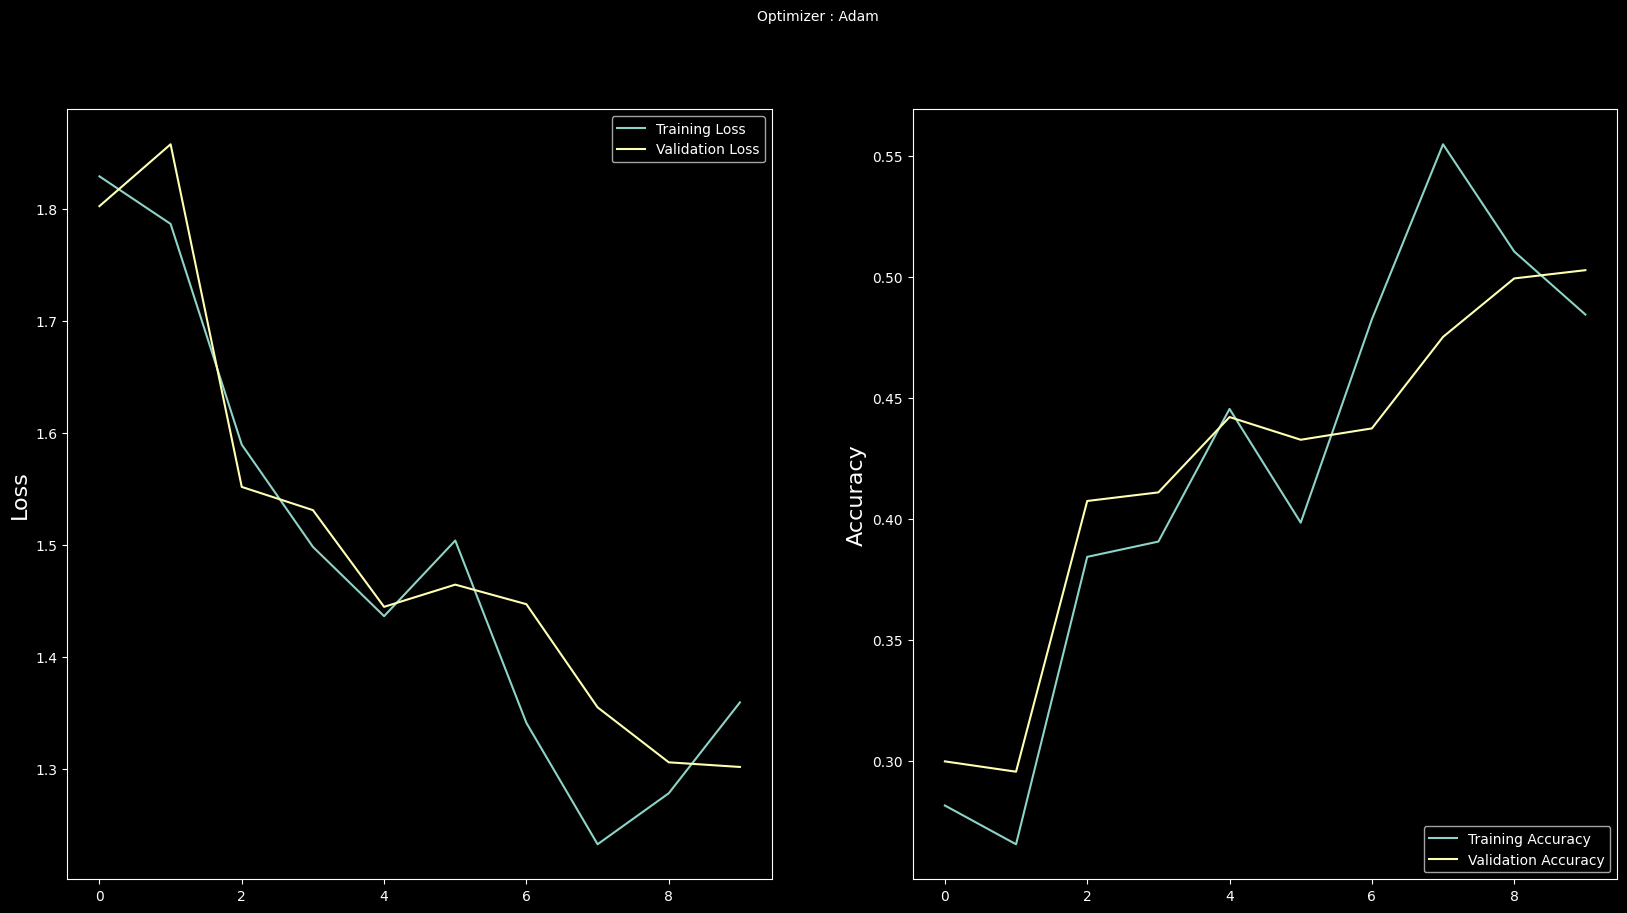

In [71]:


plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [77]:
#Accuracy of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#Loss of the model
loss = history.history['loss']
val_loss = history.history['val_loss']



In [78]:
#printing accuracy of the model
print("Accuracy of the model is: ", acc)


Accuracy of the model is:  [0.28163662552833557, 0.265625, 0.3843097686767578, 0.390625, 0.4454047977924347, 0.3984375, 0.4824173152446747, 0.5546875, 0.5104032158851624, 0.484375]


In [79]:


# List of accuracy values from different steps
acc1 = [0.28163662552833557, 0.265625, 0.3843097686767578, 0.390625, 0.4454047977924347,
       0.3984375, 0.4824173152446747, 0.5546875, 0.5104032158851624, 0.484375]

# Calculate overall accuracy by taking the mean of the list
overall_accuracy = np.mean(acc1)

# Print the overall accuracy
print("Overall accuracy of the model is: ", overall_accuracy)


Overall accuracy of the model is:  0.4197921723127365


#Our code uses a Convolutional Neural Network (CNN) to classify facial expressions from the 'face-expression-recognition-dataset.' The dataset is augmented using various transformations to prevent overfitting. The model consists of multiple convolutional layers followed by dense layers, with dropout applied to avoid overfitting. It is trained for 10 epochs using the Adam optimizer. The model's performance is tracked through training and validation accuracy and loss. After training, the model predicts facial expressions on test data, and overall accuracy is calculated, giving an insight into its classification capabilities for facial emotions.